In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v2_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo1DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [5]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dxy', 'dxyErr', 'dxybs', 'dz', 'dzErr', 'eta', 'ip3d', 'jetPtRelv2', 'jetRelIso', 'mass', 'miniPFRelIso_all', 'miniPFRelIso_chg', 'pfRelIso03_all', 'pfRelIso03_chg', 'pfRelIso04_all', 'phi', 'pt', 'ptErr', 'segmentComp', 'sip3d', 'softMva', 'tkRelIso', 'tunepRelPt', 'mvaLowPt', 'mvaTTH', 'charge', 'jetIdx', 'nStations', 'nTrackerLayers', 'pdgId', 'tightCharge', 'fsrPhotonIdx', 'highPtId', 'highPurity', 'inTimeMuon', 'isGlobal', 'isPFcand', 'isStandalone', 'isTracker', 'jetNDauCharged', 'looseId', 'mediumId', 'mediumPromptId', 'miniIsoId', 'multiIsoId', 'mvaId', 'mvaLowPtId', 'pfIsoId', 'puppiIsoId', 'softId', 'softMvaId', 'tightId', 'tkIsoId', 'triggerIdLoose', 'idx', 'trkPt', 'trkPtErr', 'dzPV', 'dzPVErr', 'dxyPVTraj', 'dxyPVTrajErr', 'dxyPVSigned', 'dxyPVSignedErr', 'ip3DPVSigned', 'ip3DPVSignedErr', 'dxyBS', 'dxyBSErr', 'dzBS', 'dzBSErr', 'dxyBSTraj', 'dxyBSTrajErr', 'dxyBSSigned', 'dxyBSSignedErr', 'ip3DBSSigned', 'ip3DBSSignedErr', 'trkNumPlanes', 'trkNumHits', 'trkNumDTHits', '

# Information for DSA Matching
## Same disentangling what we have vs what is needed to complete them is needed

## dsaMatch1

4mu dsaMatch1 structure: [[2, 3, 1, 2], [7, 6, 1, 0, 5], [3, 4, 3, ... 4, 4, 3], [4, 3, 4, 3], [4, 3, 0, 4]]
2mu2e dsaMatch1 structure: [[3, 4], [4, 4], [3, 3, 3], [2, 3], [0, 0, ... 3, 3], [4, 3], [3, 3], [3, 2], [4, 4]]
4mu dsaMatch1 structure: [[3, 3, 3, 2], [4, 2, 3, 4], [4, 2, 2, 5, ... 0], [4, 4, 4, 2, 2, 1], [1, 2, 2, 2]]
2mu2e dsaMatch1 structure: [[0, 2], [1, 2], [4, 4], [4, 3], [3, 4], ... 2], [4, 3], [3, 3], [2, 2, 3], [3, 3]]
4mu dsaMatch1 structure: [[4, 0, 4, 0, 4], [4, 4, 4], [4, 4, 4, 0, ... 4, 1], [3, 4, 4, 3], [4, 3, 0, 4, 4]]
2mu2e dsaMatch1 structure: [[3, 0], [3, 3], [2, 4], [2, 2], [4, 2, 1, ... 4, 1], [4, 3], [4, 3], [0, 4], [3, 4]]
4mu dsaMatch1 structure: [[2, 2, 4, 2], [2, 3, 0, 1], [4, 2, 1], ... 0, 0], [4], [0, 4, 4, 0], [3, 2, 3]]
2mu2e dsaMatch1 structure: [[3, 3], [4, 4], [4], [4], [3, 1, 3], [3, ... [3, 0, 3], [2], [1], [4, 3], [2, 0]]
4mu dsaMatch1 structure: [[1, 2, 0], [], [2, 3, 3], [2], [3, 2, 4, ... 2, 0], [2, 3, 3, 2], [2, 2, 2], [7, 1]]
2mu2e dsa

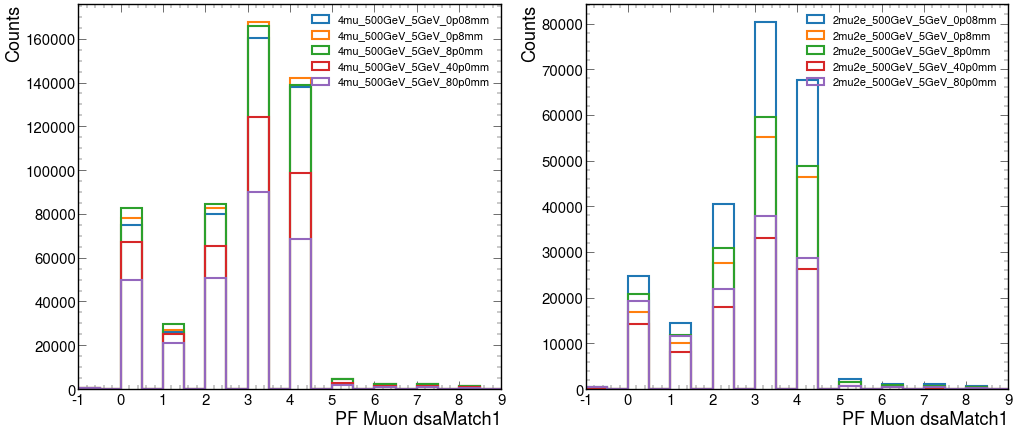

In [5]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dsaMatch1", events_4mu[i_4mu].dsaMatch1, events_2mu2e[i_2mu].dsaMatch1)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dsaMatch1), range=(-1,9), alpha=1, bins=20, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dsaMatch1), range=(-1,9), alpha=1, bins=20, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,9)
ax[1].set_xlim(-1,9)
ax[0].set_xlabel('PF Muon dsaMatch1')
ax[1].set_xlabel('PF Muon dsaMatch1')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16, loc='upper right')
ax[1].legend(fontsize=16, loc='upper right')
ax[0].set_xticks([-1,0,1,2,3,4,5,6,7,8,9])
ax[1].set_xticks([-1,0,1,2,3,4,5,6,7,8,9])
plt.savefig("../Plots/V2/PF_MUON/Info_for_DSA_matching/dsaMatch1.png", bbox_inches="tight")

## dsaMatch1idx

4mu dsaMatch1idx structure: [[0, 1, 0, 2], [3, 0, 0, 4, 1], [4, 3, 0, ... 2, 0, 3], [2, 3, 0, 1], [1, 3, 3, 2]]
2mu2e dsaMatch1idx structure: [[1, 0], [0, 1], [1, 3, 0], [1, 2], [0, 0, ... 1, 2], [0, 1], [0, 1], [0, 1], [1, 0]]
4mu dsaMatch1idx structure: [[2, 3, 4, 1], [2, 3, 4, 1], [1, 3, 3, 2, ... 4], [1, 0, 0, 2, 0, 3], [0, 2, 2, 1]]
2mu2e dsaMatch1idx structure: [[0, 0], [0, 3], [4, 0], [0, 1], [0, 1], ... 2], [0, 1], [2, 1], [4, 3, 2], [1, 0]]
4mu dsaMatch1idx structure: [[1, 4, 2, 4, 4], [2, 0, 3], [1, 4, 0, 4, ... 1, 4], [1, 0, 0, 4], [1, 3, 4, 4, 1]]
2mu2e dsaMatch1idx structure: [[1, 1], [1, 0], [0, 1], [0, 0], [2, 0, 4, ... 0, 0], [0, 1], [0, 1], [1, 1], [3, 2]]
4mu dsaMatch1idx structure: [[2, 0, 1, 0], [1, 2, 2, 0], [1, 2, 0], ... 4, 4], [0], [4, 3, 2, 4], [1, 2, 0]]
2mu2e dsaMatch1idx structure: [[1, 4], [0, 2], [2], [2], [1, 2, 0], [0, ... [1, 1, 0], [2], [2], [0, 1], [0, 1]]
4mu dsaMatch1idx structure: [[1, 0, 2], [], [3, 4, 4], [2], [1, 3, 2, ... 3, 4], [4, 0, 1, 4], [

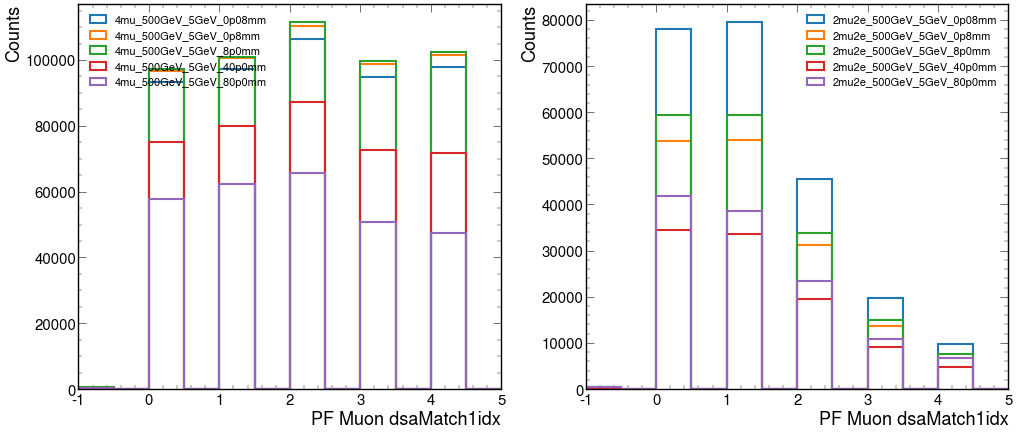

In [6]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dsaMatch1idx", events_4mu[i_4mu].dsaMatch1idx, events_2mu2e[i_2mu].dsaMatch1idx)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dsaMatch1idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dsaMatch1idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,5)
ax[1].set_xlim(-1,5)
ax[0].set_xlabel('PF Muon dsaMatch1idx')
ax[1].set_xlabel('PF Muon dsaMatch1idx')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16, loc='upper left')
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/PF_MUON/Info_for_DSA_matching/dsaMatch1idx.png", bbox_inches="tight")

## dsaMatch2

4mu dsaMatch2 structure: [[0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, ... 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
2mu2e dsaMatch2 structure: [[0, 0], [0, 0], [0, 0, 0], [0, 0], [-1, ... 0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
4mu dsaMatch2 structure: [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0, ... 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0]]
2mu2e dsaMatch2 structure: [[-1, -1], [0, 0], [0, 0], [0, 0], [0, 0], ... 0], [0, 0], [0, 0], [0, 0, 0], [0, 0]]
4mu dsaMatch2 structure: [[4, 0, 2, 0, 0], [0, 0, 0], [0, 0, 0, 0, ... 0, 0], [0, 0, 0, 0], [0, 3, 0, 0, 0]]
2mu2e dsaMatch2 structure: [[0, 0], [0, 0], [0, 0], [-1, -1], [0, 0, ... -1], [0, 0], [0, 0], [0, 2], [0, 0]]
4mu dsaMatch2 structure: [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0], ... 0, 0], [-1], [0, 0, 0, 0], [0, 0, 0]]
2mu2e dsaMatch2 structure: [[0, 0], [0, 0], [0], [0], [0, 0, 0], ... [0, 0, 0], [0], [0], [0, 0], [0, 0]]
4mu dsaMatch2 structure: [[0, 0, 0], [], [0, 0, 0], [0], [0, 0, 0, ... 0, 0], [0, 0, 0, 0], [0, 0, 0], [0, 0]]
2mu2e dsaMatch2

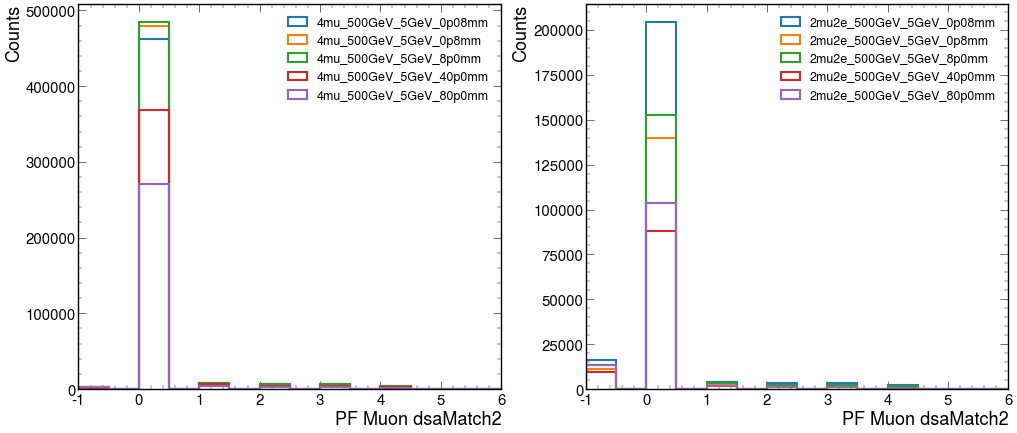

In [7]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dsaMatch2", events_4mu[i_4mu].dsaMatch2, events_2mu2e[i_2mu].dsaMatch2)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dsaMatch2), range=(-1,6), alpha=1, bins=14, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dsaMatch2), range=(-1,6), alpha=1, bins=14, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,6)
ax[1].set_xlim(-1,6)
ax[0].set_xlabel('PF Muon dsaMatch2')
ax[1].set_xlabel('PF Muon dsaMatch2')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18, loc='upper right')
ax[1].legend(fontsize=18)
ax[0].set_xticks([-1,0,1,2,3,4,5,6])
ax[1].set_xticks([-1,0,1,2,3,4,5,6])
plt.savefig("../Plots/V2/PF_MUON/Info_for_DSA_matching/dsaMatch2.png", bbox_inches="tight")

## dsaMatch2idx

4mu dsaMatch2idx structure: [[2, 2, 2, 1], [4, 4, 4, 3, 4], [3, 4, 4, ... 3, 3, 2], [4, 4, 4, 4], [3, 2, 2, 3]]
2mu2e dsaMatch2idx structure: [[4, 4], [1, 0], [3, 2, 3], [2, 1], [-1, ... 3, 3], [1, 0], [1, 0], [1, 0], [2, 2]]
4mu dsaMatch2idx structure: [[4, 4, 3, 4], [4, 4, 3, 4], [4, 4, 4, 4, ... 3], [4, 4, 4, 4, 4, 4], [2, 1, 1, 2]]
2mu2e dsaMatch2idx structure: [[-1, -1], [3, 2], [3, 4], [1, 0], [1, 0], ... 1], [1, 0], [1, 2], [3, 4, 4], [0, 1]]
4mu dsaMatch2idx structure: [[0, 3, 0, 3, 3], [3, 3, 2], [4, 3, 4, 3, ... 4, 3], [4, 4, 4, 3], [4, 2, 3, 3, 4]]
2mu2e dsaMatch2idx structure: [[0, 0], [0, 1], [1, 0], [-1, -1], [4, 4, ... -1], [1, 0], [2, 2], [0, 0], [4, 4]]
4mu dsaMatch2idx structure: [[3, 3, 3, 3], [2, 1, 1, 2], [2, 1, 2], ... 3, 3], [-1], [3, 4, 4, 3], [2, 1, 2]]
2mu2e dsaMatch2idx structure: [[4, 3], [2, 1], [1], [1], [2, 1, 2], ... [0, 0, 1], [3], [4], [1, 0], [1, 0]]
4mu dsaMatch2idx structure: [[2, 2, 1], [], [4, 3, 3], [1], [3, 2, 3, ... 4, 3], [3, 4, 4, 3], [4, 3, 

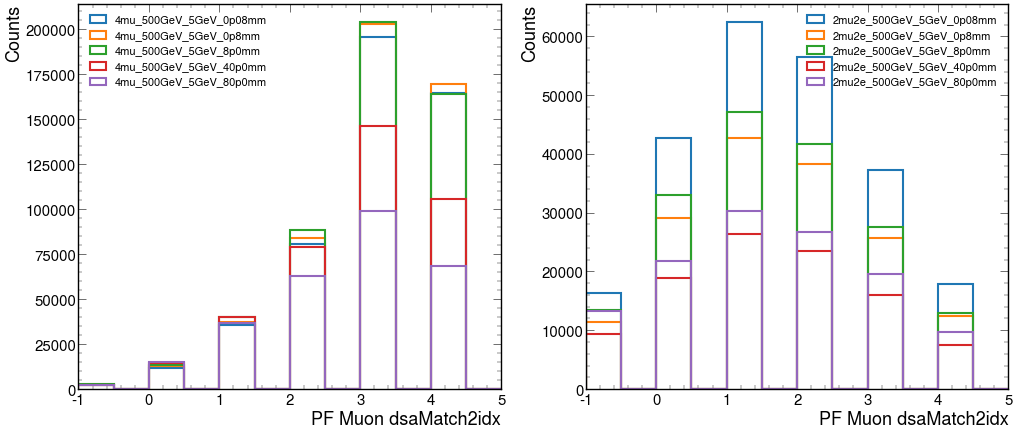

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dsaMatch2idx", events_4mu[i_4mu].dsaMatch2idx, events_2mu2e[i_2mu].dsaMatch2idx)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dsaMatch2idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dsaMatch2idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,5)
ax[1].set_xlim(-1,5)
ax[0].set_xlabel('PF Muon dsaMatch2idx')
ax[1].set_xlabel('PF Muon dsaMatch2idx')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16, loc='upper left')
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/PF_MUON/Info_for_DSA_matching/dsaMatch2idx.png", bbox_inches="tight")

## dsaMatch3

4mu dsaMatch3 structure: [[0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, ... 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
2mu2e dsaMatch3 structure: [[0, 0], [-1, -1], [0, 0, 0], [0, 0], ... [-1, -1], [-1, -1], [-1, -1], [0, 0]]
4mu dsaMatch3 structure: [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0, ... 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0]]
2mu2e dsaMatch3 structure: [[-1, -1], [0, 0], [0, 0], [-1, -1], [-1, ... [-1, -1], [0, 0], [0, 0, 0], [-1, -1]]
4mu dsaMatch3 structure: [[0, 0, 0, 0, 0], [0, 0, 0], [0, 0, 0, 0, ... 0, 0], [0, 0, 0, 0], [0, 0, 0, 0, 0]]
2mu2e dsaMatch3 structure: [[-1, -1], [-1, -1], [-1, -1], [-1, -1], ... [-1, -1], [0, 0], [-1, -1], [0, 0]]
4mu dsaMatch3 structure: [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0], ... 0, 0], [-1], [0, 0, 0, 0], [0, 0, 0]]
2mu2e dsaMatch3 structure: [[0, 0], [0, 0], [0], [0], [0, 0, 0], ... [-1, -1, -1], [0], [0], [-1, -1], [-1, -1]]
4mu dsaMatch3 structure: [[0, 0, 0], [], [0, 0, 0], [0], [0, 0, 0, ... 0, 0], [0, 0, 0, 0], [0, 0, 0], [0, 0]]
2mu2e dsaMatch3

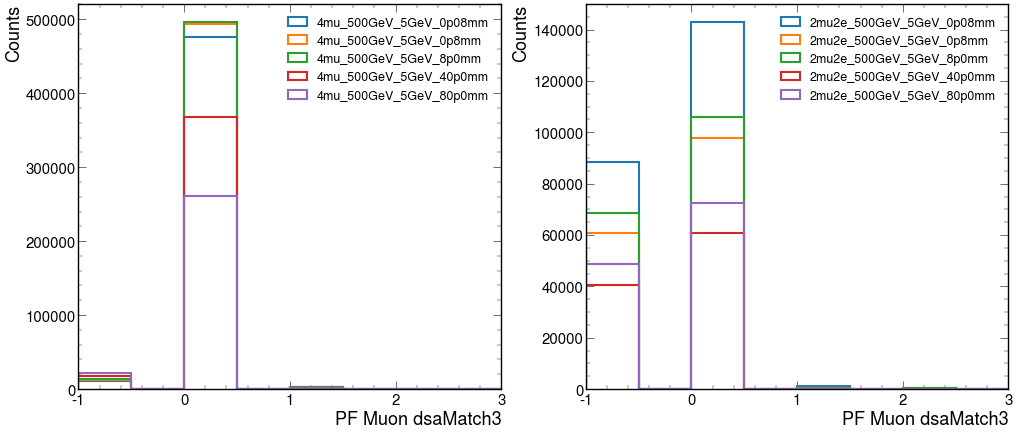

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dsaMatch3", events_4mu[i_4mu].dsaMatch3, events_2mu2e[i_2mu].dsaMatch3)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dsaMatch3), range=(-1,3), alpha=1, bins=8, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dsaMatch3), range=(-1,3), alpha=1, bins=8, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,3)
ax[1].set_xlim(-1,3)
ax[0].set_xlabel('PF Muon dsaMatch3')
ax[1].set_xlabel('PF Muon dsaMatch3')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18, loc='upper right')
ax[1].legend(fontsize=18)
ax[0].set_xticks([-1,0,1,2,3])
ax[1].set_xticks([-1,0,1,2,3])
plt.savefig("../Plots/V2/PF_MUON/Info_for_DSA_matching/dsaMatch3.png", bbox_inches="tight")

## dsaMatch3idx

4mu dsaMatch3idx structure: [[1, 0, 1, 0], [2, 3, 3, 2, 3], [2, 2, 3, ... 1, 2, 1], [3, 2, 3, 3], [2, 1, 1, 1]]
2mu2e dsaMatch3idx structure: [[3, 3], [-1, -1], [2, 1, 2], [0, 0], ... [-1, -1], [-1, -1], [-1, -1], [0, 1]]
4mu dsaMatch3idx structure: [[3, 2, 2, 3], [3, 2, 2, 3], [3, 2, 2, 3, ... 2], [3, 3, 3, 3, 3, 2], [1, 0, 0, 0]]
2mu2e dsaMatch3idx structure: [[-1, -1], [2, 1], [2, 3], [-1, -1], [-1, ... [-1, -1], [0, 0], [2, 2, 3], [-1, -1]]
4mu dsaMatch3idx structure: [[4, 2, 4, 2, 2], [1, 2, 1], [3, 2, 3, 2, ... 3, 2], [3, 3, 3, 2], [3, 4, 2, 2, 3]]
2mu2e dsaMatch3idx structure: [[-1, -1], [-1, -1], [-1, -1], [-1, -1], ... [-1, -1], [1, 0], [-1, -1], [2, 3]]
4mu dsaMatch3idx structure: [[1, 2, 2, 2], [0, 0, 0, 1], [0, 0, 1], ... 2, 2], [-1], [2, 2, 3, 2], [0, 0, 1]]
2mu2e dsaMatch3idx structure: [[3, 2], [1, 0], [0], [0], [0, 0, 1], ... [-1, -1, -1], [1], [3], [-1, -1], [-1, -1]]
4mu dsaMatch3idx structure: [[0, 1, 0], [], [2, 2, 2], [0], [2, 1, 1, ... 2, 2], [2, 3, 3, 2], [3, 2, 

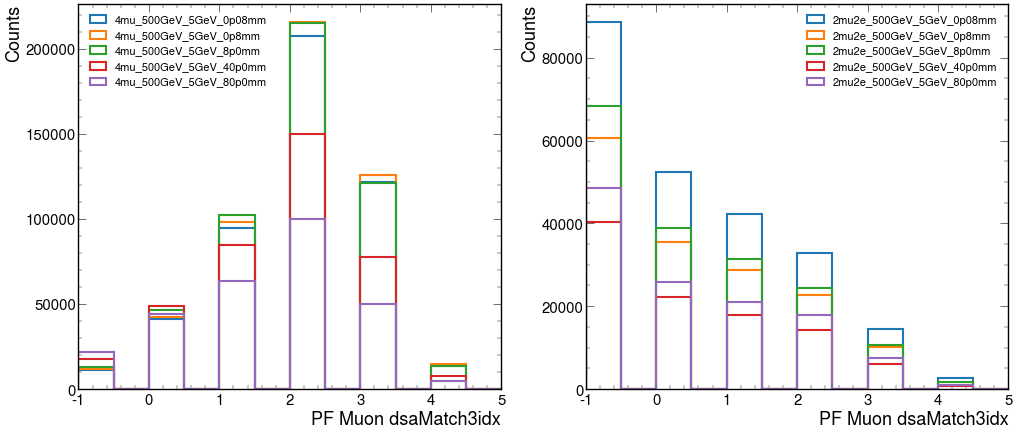

In [10]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dsaMatch3idx", events_4mu[i_4mu].dsaMatch3idx, events_2mu2e[i_2mu].dsaMatch3idx)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dsaMatch3idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dsaMatch3idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,5)
ax[1].set_xlim(-1,5)
ax[0].set_xlabel('PF Muon dsaMatch3idx')
ax[1].set_xlabel('PF Muon dsaMatch3idx')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16, loc='upper left')
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/PF_MUON/Info_for_DSA_matching/dsaMatch3idx.png", bbox_inches="tight")

## dsaMatch4

4mu dsaMatch4 structure: [[-1, -1, -1, -1], [0, 0, 0, 0, 0], [0, 0, ... 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
2mu2e dsaMatch4 structure: [[0, 0], [-1, -1], [0, 0, 0], [-1, -1], ... [-1, -1], [-1, -1], [-1, -1], [-1, -1]]
4mu dsaMatch4 structure: [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, ... 0], [0, 0, 0, 0, 0, 0], [-1, -1, -1, -1]]
2mu2e dsaMatch4 structure: [[-1, -1], [0, 0], [0, 0], [-1, -1], ... [-1, -1], [-1, -1], [0, 0, 0], [-1, -1]]
4mu dsaMatch4 structure: [[0, 0, 0, 0, 0], [0, 0, 0], [0, 0, 0, 0, ... 0, 0], [0, 0, 0, 0], [0, 0, 0, 0, 0]]
2mu2e dsaMatch4 structure: [[-1, -1], [-1, -1], [-1, -1], [-1, -1], ... [-1, -1], [-1, -1], [-1, -1], [0, 0]]
4mu dsaMatch4 structure: [[0, 0, 0, 0], [-1, -1, -1, -1], [-1, -1, ... [-1], [0, 0, 0, 0], [-1, -1, -1]]
2mu2e dsaMatch4 structure: [[0, 0], [-1, -1], [-1], [-1], [-1, -1, ... -1, -1], [0], [0], [-1, -1], [-1, -1]]
4mu dsaMatch4 structure: [[-1, -1, -1], [], [0, 0, 0], [-1], [0, 0, ... 0], [0, 0, 0, 0], [0, 0, 0], [0, 0]]
2mu2e dsaMatch4 s

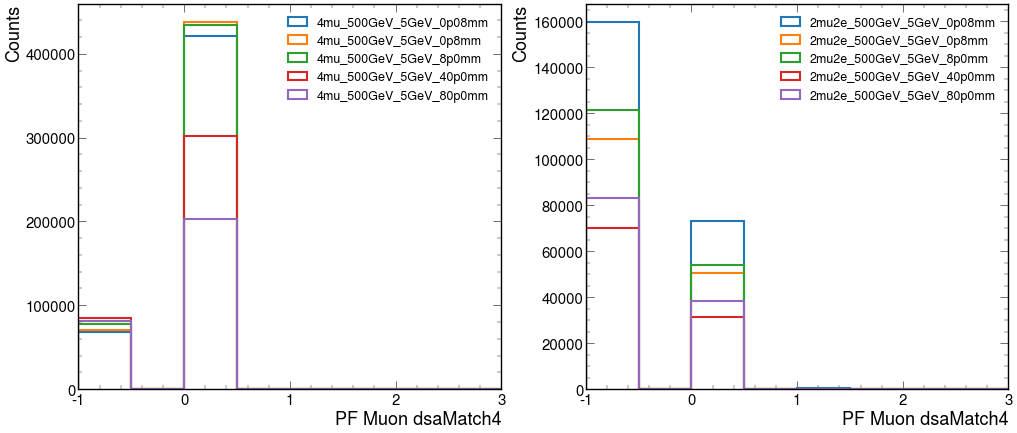

In [12]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dsaMatch4", events_4mu[i_4mu].dsaMatch4, events_2mu2e[i_2mu].dsaMatch4)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dsaMatch4), range=(-1,3), alpha=1, bins=8, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dsaMatch4), range=(-1,3), alpha=1, bins=8, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,3)
ax[1].set_xlim(-1,3)
ax[0].set_xlabel('PF Muon dsaMatch4')
ax[1].set_xlabel('PF Muon dsaMatch4')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18, loc='upper right')
ax[1].legend(fontsize=18)
ax[0].set_xticks([-1,0,1,2,3])
ax[1].set_xticks([-1,0,1,2,3])
plt.savefig("../Plots/V2/PF_MUON/Info_for_DSA_matching/dsaMatch4.png", bbox_inches="tight")

## dsaMatch4idx

4mu dsaMatch4idx structure: [[-1, -1, -1, -1], [1, 2, 2, 1, 2], [1, 1, ... 0, 1, 0], [1, 1, 2, 2], [0, 0, 0, 0]]
2mu2e dsaMatch4idx structure: [[2, 2], [-1, -1], [0, 0, 1], [-1, -1], ... [-1, -1], [-1, -1], [-1, -1], [-1, -1]]
4mu dsaMatch4idx structure: [[1, 1, 1, 2], [1, 1, 1, 2], [2, 1, 1, ... 1], [2, 2, 2, 1, 2, 1], [-1, -1, -1, -1]]
2mu2e dsaMatch4idx structure: [[-1, -1], [1, 0], [1, 2], [-1, -1], ... [-1, -1], [-1, -1], [1, 1, 1], [-1, -1]]
4mu dsaMatch4idx structure: [[3, 1, 3, 1, 1], [0, 1, 0], [2, 1, 2, 1, ... 2, 1], [2, 2, 2, 1], [2, 1, 1, 1, 2]]
2mu2e dsaMatch4idx structure: [[-1, -1], [-1, -1], [-1, -1], [-1, -1], ... [-1, -1], [-1, -1], [-1, -1], [1, 1]]
4mu dsaMatch4idx structure: [[0, 1, 0, 1], [-1, -1, -1, -1], [-1, -1, ... [-1], [1, 1, 1, 1], [-1, -1, -1]]
2mu2e dsaMatch4idx structure: [[2, 1], [-1, -1], [-1], [-1], [-1, -1, ... -1, -1], [0], [1], [-1, -1], [-1, -1]]
4mu dsaMatch4idx structure: [[-1, -1, -1], [], [1, 1, 1], [-1], [0, 0, ... 1], [1, 2, 2, 1], [1, 1, 1]

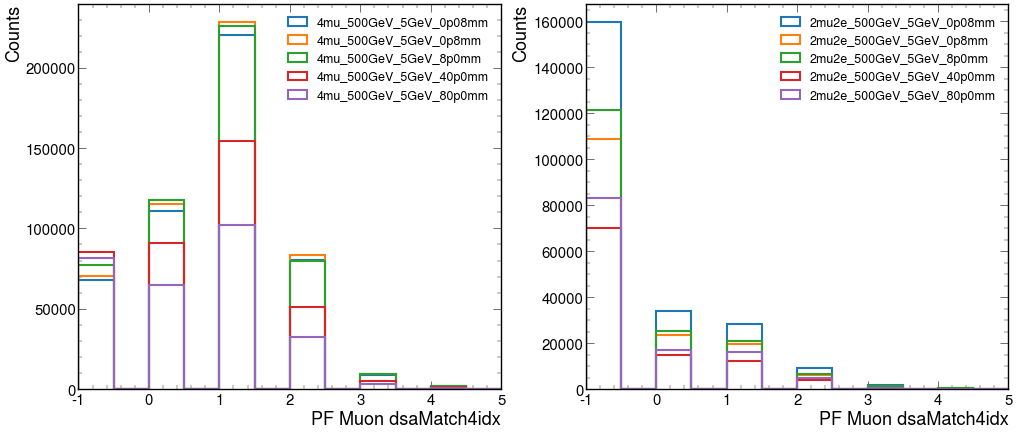

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dsaMatch4idx", events_4mu[i_4mu].dsaMatch4idx, events_2mu2e[i_2mu].dsaMatch4idx)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dsaMatch4idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dsaMatch4idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,5)
ax[1].set_xlim(-1,5)
ax[0].set_xlabel('PF Muon dsaMatch4idx')
ax[1].set_xlabel('PF Muon dsaMatch4idx')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18, loc='upper right')
ax[1].legend(fontsize=18)
plt.savefig("../Plots/V2/PF_MUON/Info_for_DSA_matching/dsaMatch4idx.png", bbox_inches="tight")

## dsaMatch5

4mu dsaMatch5 structure: [[-1, -1, -1, -1], [0, 0, 0, 0, 0], [0, ... -1, -1], [0, 0, 0, 0], [-1, -1, -1, -1]]
2mu2e dsaMatch5 structure: [[0, 0], [-1, -1], [-1, -1, -1], [-1, -1, ... [-1, -1], [-1, -1], [-1, -1], [-1, -1]]
4mu dsaMatch5 structure: [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, ... 0], [0, 0, 0, 0, 0, 0], [-1, -1, -1, -1]]
2mu2e dsaMatch5 structure: [[-1, -1], [-1, -1], [0, 0], [-1, -1], ... -1, -1], [-1, -1], [0, 0, 0], [-1, -1]]
4mu dsaMatch5 structure: [[0, 0, 0, 0, 0], [-1, -1, -1], [0, 0, 0, ... 0, 0], [0, 0, 0, 0], [0, 0, 0, 0, 0]]
2mu2e dsaMatch5 structure: [[-1, -1], [-1, -1], [-1, -1], [-1, -1], ... [-1, -1], [-1, -1], [-1, -1], [0, 0]]
4mu dsaMatch5 structure: [[-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, ... [-1], [0, 0, 0, 0], [-1, -1, -1]]
2mu2e dsaMatch5 structure: [[0, 0], [-1, -1], [-1], [-1], [-1, -1, ... -1, -1], [-1], [0], [-1, -1], [-1, -1]]
4mu dsaMatch5 structure: [[-1, -1, -1], [], [0, 0, 0], [-1], [-1, ... 0], [0, 0, 0, 0], [0, 0, 0], [-1, -1]]
2mu2e dsa

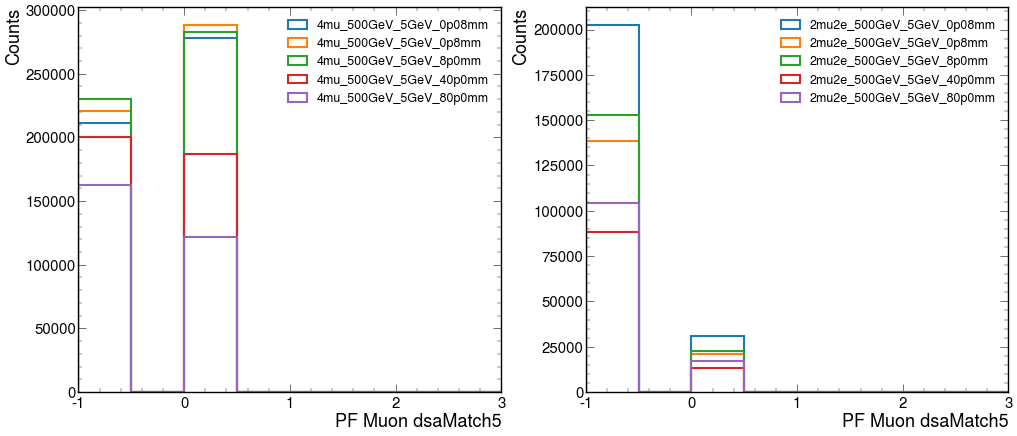

In [15]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dsaMatch5", events_4mu[i_4mu].dsaMatch5, events_2mu2e[i_2mu].dsaMatch5)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dsaMatch5), range=(-1,3), alpha=1, bins=8, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dsaMatch5), range=(-1,3), alpha=1, bins=8, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,3)
ax[1].set_xlim(-1,3)
ax[0].set_xlabel('PF Muon dsaMatch5')
ax[1].set_xlabel('PF Muon dsaMatch5')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18, loc='upper right')
ax[1].legend(fontsize=18)
ax[0].set_xticks([-1,0,1,2,3])
ax[1].set_xticks([-1,0,1,2,3])
plt.savefig("../Plots/V2/PF_MUON/Info_for_DSA_matching/dsaMatch5.png", bbox_inches="tight")

## dsaMatch5idx

4mu dsaMatch5idx structure: [[-1, -1, -1, -1], [0, 1, 1, 0, 0], [0, ... -1, -1], [0, 0, 1, 0], [-1, -1, -1, -1]]
2mu2e dsaMatch5idx structure: [[0, 1], [-1, -1], [-1, -1, -1], [-1, -1, ... [-1, -1], [-1, -1], [-1, -1], [-1, -1]]
4mu dsaMatch5idx structure: [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, ... 0], [0, 1, 1, 0, 1, 0], [-1, -1, -1, -1]]
2mu2e dsaMatch5idx structure: [[-1, -1], [-1, -1], [0, 1], [-1, -1], ... -1, -1], [-1, -1], [0, 0, 0], [-1, -1]]
4mu dsaMatch5idx structure: [[2, 0, 1, 0, 0], [-1, -1, -1], [0, 0, 1, ... 0, 0], [0, 1, 1, 0], [0, 0, 0, 0, 0]]
2mu2e dsaMatch5idx structure: [[-1, -1], [-1, -1], [-1, -1], [-1, -1], ... [-1, -1], [-1, -1], [-1, -1], [0, 0]]
4mu dsaMatch5idx structure: [[-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, ... [-1], [0, 0, 0, 0], [-1, -1, -1]]
2mu2e dsaMatch5idx structure: [[0, 0], [-1, -1], [-1], [-1], [-1, -1, ... -1, -1], [-1], [0], [-1, -1], [-1, -1]]
4mu dsaMatch5idx structure: [[-1, -1, -1], [], [0, 0, 0], [-1], [-1, ... 0], [0, 1, 0, 0], [0,

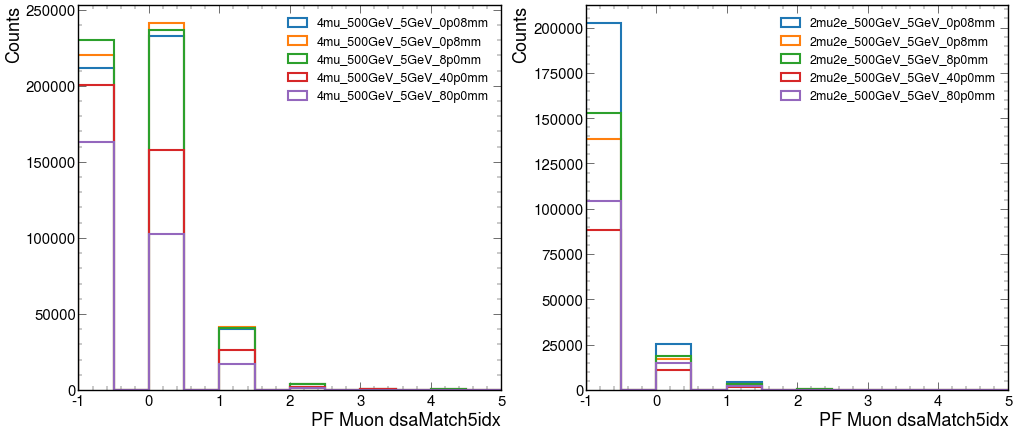

In [16]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("dsaMatch5idx", events_4mu[i_4mu].dsaMatch5idx, events_2mu2e[i_2mu].dsaMatch5idx)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].dsaMatch5idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].dsaMatch5idx), range=(-1,5), alpha=1, bins=12, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,5)
ax[1].set_xlim(-1,5)
ax[0].set_xlabel('PF Muon dsaMatch5idx')
ax[1].set_xlabel('PF Muon dsaMatch5idx')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18, loc='upper right')
ax[1].legend(fontsize=18)
plt.savefig("../Plots/V2/PF_MUON/Info_for_DSA_matching/dsaMatch5idx.png", bbox_inches="tight")